**NAMANI HARSHITH -(20MID0157)** - ASSIGNMENT - 03

In [4]:
#NAMANI HARSHITH - 20MID0157
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
!pip install -q keras

In [6]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [7]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import cv2 as cv

In [8]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [9]:
train = train_gen.flow_from_directory('/content/drive/MyDrive/archive (/train_data/train_data',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)
test = test_gen.flow_from_directory('/content/drive/MyDrive/archive (/test_data/test_data',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [10]:
print(train.class_indices)
print(test.class_indices)

{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}
{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}


In [11]:
#CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
Convolution2D(20,(3,3),activation = 'relu',input_shape=(120,120,3)),
MaxPooling2D(2,2),
Flatten(),
Dense(45,activation = 'relu'),
Dense(16,activation = 'softmax')
])

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_fit = model.fit(train,epochs =20,validation_data = test ,batch_size=5)

Epoch 1/20
19/19 [==============================] - 136s 7s/step - loss: 3.3963 - accuracy: 0.0867 - val_loss: 2.7619 - val_accuracy: 0.0892
Epoch 2/20
19/19 [==============================] - 128s 7s/step - loss: 2.6977 - accuracy: 0.1067 - val_loss: 2.7665 - val_accuracy: 0.0318
Epoch 3/20
19/19 [==============================] - 126s 7s/step - loss: 2.5628 - accuracy: 0.2000 - val_loss: 2.7190 - val_accuracy: 0.1529
Epoch 4/20
19/19 [==============================] - 102s 6s/step - loss: 2.3813 - accuracy: 0.2333 - val_loss: 2.7296 - val_accuracy: 0.1465
Epoch 5/20
19/19 [==============================] - 126s 7s/step - loss: 2.1334 - accuracy: 0.4000 - val_loss: 2.7246 - val_accuracy: 0.1783
Epoch 6/20
19/19 [==============================] - 129s 7s/step - loss: 1.9106 - accuracy: 0.4133 - val_loss: 2.8285 - val_accuracy: 0.1592
Epoch 7/20
19/19 [==============================] - 102s 6s/step - loss: 1.7529 - accuracy: 0.4600 - val_loss: 2.9119 - val_accuracy: 0.2038
Epoch 8/20
19

In [15]:
model.save('birds.h5')

In [16]:
model_new = tf.keras.models.load_model('/content/birds.h5')

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
output = ['rebimg','wcrsrt','jglowl','ibicrw','mgprob','hsparo',
'indvul','himgri','himbul','gretit','hilpig','cbrtsh',
'cmnmyn','bonegl','brhkyt','blasti']
print(output)

['rebimg', 'wcrsrt', 'jglowl', 'ibicrw', 'mgprob', 'hsparo', 'indvul', 'himgri', 'himbul', 'gretit', 'hilpig', 'cbrtsh', 'cmnmyn', 'bonegl', 'brhkyt', 'blasti']


In [18]:
img1 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/mgprob/100_5590.JPG",target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 212ms/step
13
bonegl


In [19]:
img2 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/lbicrw/100_4037.JPG",target_size=(120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 27ms/step
12
cmnmyn


In [20]:
img3 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/rebimg/100_5744.JPG",target_size=(120,120))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 29ms/step
14
brhkyt


In [21]:
img4 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/hilpig/DSC_6272.jpg",target_size=(120,120))
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 30ms/step
6
indvul


In [22]:
img5 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/himbul/100_5028.JPG",target_size=(120,120))
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 27ms/step
7
himgri


In [23]:
img6 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/hsparo/100_4757.JPG",target_size=(120,120))
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
pred = np.argmax(model.predict(img6))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 32ms/step
9
gretit


In [24]:
img7 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/indvul/DSC_0502.jpg",target_size=(120,120))
img7 = image.img_to_array(img7)
img7 = np.expand_dims(img7,axis=0)
pred = np.argmax(model.predict(img7))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 46ms/step
10
hilpig


In [25]:
img8 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/gretit/100_5042.JPG",target_size=(120,120))
img8 = image.img_to_array(img8)
img8 = np.expand_dims(img8,axis=0)
pred = np.argmax(model.predict(img8))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 72ms/step
5
hsparo


In [29]:
img9 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/wcrsrt/100_4453.JPG",target_size=(120,120))
img9 = image.img_to_array(img9)
img9 = np.expand_dims(img9,axis=0)
pred = np.argmax(model.predict(img9))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 49ms/step
15
blasti


In [30]:
img10 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/jglowl/12152151476_7a1524aabb_o.jpg",target_size=(120,120))
img10 = image.img_to_array(img10)
img10 = np.expand_dims(img10,axis=0)
pred = np.argmax(model.predict(img10))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 28ms/step
11
cbrtsh


In [27]:
img11 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/cbrtsh/100_5097.JPG",target_size=(120,120))
img11 = image.img_to_array(img11)
img11 = np.expand_dims(img11,axis=0)
pred = np.argmax(model.predict(img11))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 30ms/step
3
ibicrw


In [28]:
img12 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/cmnmyn/100_5763.JPG",target_size=(120,120))
img12 = image.img_to_array(img12)
img12 = np.expand_dims(img12,axis=0)
pred = np.argmax(model.predict(img12))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 27ms/step
4
mgprob


In [31]:
img13 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/bonegl/DSC_4570.jpg",target_size=(120,120))
img13 = image.img_to_array(img13)
img13 = np.expand_dims(img13,axis=0)
pred = np.argmax(model.predict(img13))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 32ms/step
1
wcrsrt


In [32]:
img14 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/blasti/DSC_6382.jpg",target_size=(120,120))
img14 = image.img_to_array(img14)
img14 = np.expand_dims(img14,axis=0)
pred = np.argmax(model.predict(img14))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 28ms/step
0
rebimg


In [33]:
img15 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/brhkyt/D72_0400.jpg",target_size=(120,120))
img15 = image.img_to_array(img15)
img15 = np.expand_dims(img15,axis=0)
pred = np.argmax(model.predict(img15))
print(pred)
print(output[pred])


1/1 [==============================] - 0s 40ms/step
2
jglowl


In [34]:
model = Sequential([
    Convolution2D(15,(3,3),activation = 'relu',input_shape=(120,120,3)),
    MaxPooling2D(2,2),
    Convolution2D(30,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Convolution2D(45,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Convolution2D(60,(3,3),activation = 'relu',input_shape=(120,120,3)),
    MaxPooling2D(2,2),
    Convolution2D(75,(3,3),activation = 'relu',input_shape=(120,120,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(62,activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(16,activation = 'relu'),
    Dense(16,activation = 'softmax')
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 15)      420       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 15)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 30)        4080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 45)        12195     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 45)      

In [35]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [36]:
model_fit = model.fit(train,epochs =50,
                     validation_data = test ,
                      batch_size=5)

Epoch 1/50
19/19 [==============================] - 108s 6s/step - loss: 2.7783 - accuracy: 0.0200 - val_loss: 2.7700 - val_accuracy: 0.0955
Epoch 2/50
19/19 [==============================] - 127s 7s/step - loss: 2.7673 - accuracy: 0.0667 - val_loss: 2.7626 - val_accuracy: 0.0955
Epoch 3/50
19/19 [==============================] - 126s 7s/step - loss: 2.7553 - accuracy: 0.1067 - val_loss: 2.7580 - val_accuracy: 0.0955
Epoch 4/50
19/19 [==============================] - 127s 7s/step - loss: 2.7120 - accuracy: 0.1400 - val_loss: 2.7186 - val_accuracy: 0.1019
Epoch 5/50
19/19 [==============================] - 104s 6s/step - loss: 2.6608 - accuracy: 0.0800 - val_loss: 2.6819 - val_accuracy: 0.1401
Epoch 6/50
19/19 [==============================] - 127s 7s/step - loss: 2.5495 - accuracy: 0.1000 - val_loss: 2.8297 - val_accuracy: 0.0828
Epoch 7/50
19/19 [==============================] - 103s 6s/step - loss: 2.5043 - accuracy: 0.1667 - val_loss: 2.6823 - val_accuracy: 0.1210
Epoch 8/50
19

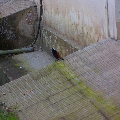

In [37]:
img = image.load_img('/content/drive/MyDrive/archive (/test_data/test_data/wcrsrt/100_4462.JPG',target_size=(120,120))
img

In [38]:
#Change dimension to 3
img = np.expand_dims(img,axis=0)
img

array([[[[121, 121, 133],
         [125, 121, 138],
         [123, 123, 135],
         ...,
         [139, 142, 161],
         [141, 139, 160],
         [131, 132, 152]],

        [[131, 136, 158],
         [124, 119, 139],
         [127, 123, 140],
         ...,
         [137, 138, 156],
         [143, 144, 164],
         [144, 142, 163]],

        [[101,  99, 110],
         [109, 111, 126],
         [103, 104, 122],
         ...,
         [141, 142, 160],
         [140, 141, 161],
         [140, 138, 159]],

        ...,

        [[ 82,  96,  43],
         [ 37,  62,  23],
         [ 59,  86,  33],
         ...,
         [112, 103,  62],
         [112,  98,  72],
         [100,  92,  55]],

        [[ 76,  93,  38],
         [ 63,  67,  50],
         [ 52,  79,  28],
         ...,
         [114, 106,  59],
         [113, 106,  64],
         [112, 101,  71]],

        [[ 67,  91,  43],
         [ 60,  79,  33],
         [ 57,  74,  32],
         ...,
         [111, 103,  54],
        

In [39]:
#Change dimension to 3
img = np.expand_dims(img,axis=0)
img

array([[[[[121, 121, 133],
          [125, 121, 138],
          [123, 123, 135],
          ...,
          [139, 142, 161],
          [141, 139, 160],
          [131, 132, 152]],

         [[131, 136, 158],
          [124, 119, 139],
          [127, 123, 140],
          ...,
          [137, 138, 156],
          [143, 144, 164],
          [144, 142, 163]],

         [[101,  99, 110],
          [109, 111, 126],
          [103, 104, 122],
          ...,
          [141, 142, 160],
          [140, 141, 161],
          [140, 138, 159]],

         ...,

         [[ 82,  96,  43],
          [ 37,  62,  23],
          [ 59,  86,  33],
          ...,
          [112, 103,  62],
          [112,  98,  72],
          [100,  92,  55]],

         [[ 76,  93,  38],
          [ 63,  67,  50],
          [ 52,  79,  28],
          ...,
          [114, 106,  59],
          [113, 106,  64],
          [112, 101,  71]],

         [[ 67,  91,  43],
          [ 60,  79,  33],
          [ 57,  74,  32],
         

In [41]:
#Prediction

img1 = image.load_img("/content/drive/MyDrive/archive (/train_data/train_data/mgprob/100_5590.JPG",target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 207ms/step
14
brhkyt
